# Aim
To Attain the best accuracy of detecting pneumonia through CNN and Chest X-Ray Images.

# Description -
Pneumonia is an inflammatory condition of the lung primarily affecting the small air sacs known as alveoli. Symptoms typically include some combination of productive or dry cough, chest pain, fever, and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria, and less commonly by other microorganisms. Identifying the responsible pathogen can be difficult. Diagnosis is often based on symptoms and physical examination. Chest X-rays, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia. Risk factors for pneumonia include cystic fibrosis, chronic obstructive pulmonary disease (COPD), sickle cell disease, asthma, diabetes, heart failure, a history of smoking, a poor ability to cough (such as following a stroke), and a weak immune system.

<div>
<img src="https://dk4fkkwa4o9l0.cloudfront.net/production/uploads/article/image/1321/PNM.png" width="500px" height="500px">
</div>

People with infectious pneumonia often have a productive cough, fever accompanied by shaking chills, shortness of breath, sharp or stabbing chest pain during deep breaths, and an increased rate of breathing. In elderly people, confusion may be the most prominent sign.

# Import Modules

In [85]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import keras
import tensorflow as tf
import scipy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Description of the dataset -
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

# Reading Dataset -

In [86]:
train = './input/chest_xray/train/'
test = './input/chest_xray/test/'
val = './input/chest_xray/val/'

# Data Visualization of train -

In [87]:
pneumonia_num = len(os.listdir(os.path.join(train, 'PNEUMONIA')))
print("Pneumonia: ",pneumonia_num)
normal_num = len(os.listdir(os.path.join(train, 'NORMAL')))
print("Normal: ",normal_num)

Pneumonia:  3875
Normal:  1341


# Data Visualization of test -

In [88]:
pneumonia_num = len(os.listdir(os.path.join(test, 'PNEUMONIA')))
print("Pneumonia: ",pneumonia_num)
normal_num = len(os.listdir(os.path.join(test, 'NORMAL')))
print("Normal: ",normal_num)

Pneumonia:  390
Normal:  234


# Data Visualization of val -

In [89]:
pneumonia_num = len(os.listdir(os.path.join(test, 'PNEUMONIA')))
print("Pneumonia: ",pneumonia_num)
normal_num = len(os.listdir(os.path.join(test, 'NORMAL')))
print("Normal: ",normal_num)

Pneumonia:  390
Normal:  234


# Image Visualization of normal chest image

Text(0.5, 1.0, 'Normal')

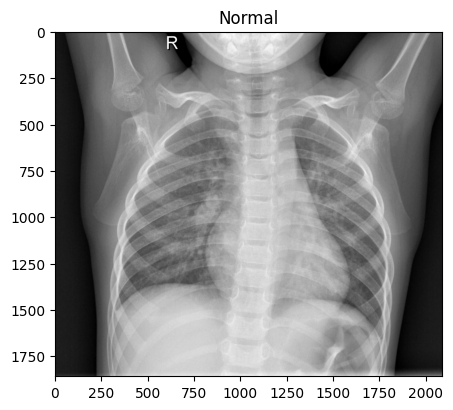

In [90]:
normal_dir = './input/chest_xray/train/NORMAL/'
normal_img = os.listdir('./input/chest_xray/train/NORMAL/')[0]
img = plt.imread(os.path.join(normal_dir, normal_img))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title("Normal")

# Image Visualization of pneumonia effected chest image

Text(0.5, 1.0, 'Pneumonia')

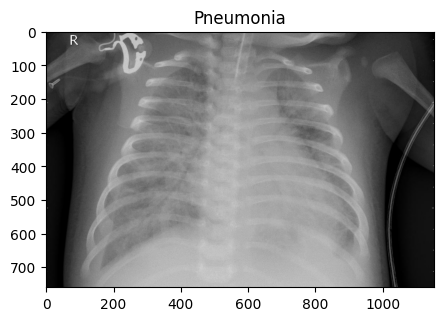

In [91]:
pneumonia_dir = './input/chest_xray/train/PNEUMONIA/'
pneumonia_img = os.listdir('./input/chest_xray/train/PNEUMONIA/')[0]
img = plt.imread(os.path.join(pneumonia_dir, pneumonia_img))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title("Pneumonia")

# Data Pre-Processing

In [92]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_std_normalization=True,
    samplewise_center=True
)

# Examining Each dataset for Data Pre-Processing

In [93]:
train_path = image_generator.flow_from_directory(
    train,
    batch_size = 32,
    shuffle = True,
    target_size = (320, 320),
    class_mode = 'binary',
)

test_path = image_generator.flow_from_directory(
    test,
    batch_size = 32,
    shuffle = True,
    target_size = (320,320),
    class_mode = 'binary'
)

val_path = image_generator.flow_from_directory(
    val,
    batch_size = 32,
    shuffle = True,
    target_size = (320, 320),
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [94]:
weight_for_0 = pneumonia_num / (normal_num + pneumonia_num)
weight_for_1 = normal_num / (normal_num + pneumonia_num)
class_weight = {0: weight_for_0, 1: weight_for_1}
print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.62
Weight for class 1: 0.38


# Data Augmentation

In [95]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2, 2), input_shape=(320,320, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2, 2), input_shape=(320,320, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),  activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['binary_accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 159, 159, 32)      896       
                                                                 
 batch_normalization_28 (Bat  (None, 159, 159, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 79, 79, 32)        9248      
                                                                 
 batch_normalization_29 (Bat  (None, 79, 79, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                      

In [96]:
history = model.fit(
    train_path,
    epochs=5,
    validation_data=val_path,
    class_weight=class_weight,
    steps_per_epoch=110,
    validation_steps=300
)

Epoch 1/5
110/110 [==============================] - 279s 2s/step - loss: 0.1490 - binary_accuracy: 0.9068 - val_loss: 15.6866 - val_binary_accuracy: 0.5000
Epoch 2/5
110/110 [==============================] - 247s 2s/step - loss: 0.0806 - binary_accuracy: 0.9335
Epoch 3/5
110/110 [==============================] - 227s 2s/step - loss: 0.0656 - binary_accuracy: 0.9494
Epoch 4/5
110/110 [==============================] - 215s 2s/step - loss: 0.0629 - binary_accuracy: 0.9503
Epoch 5/5
110/110 [==============================] - 217s 2s/step - loss: 0.0525 - binary_accuracy: 0.9597


Text(0.5, 1.0, 'Accuracy Evolution')

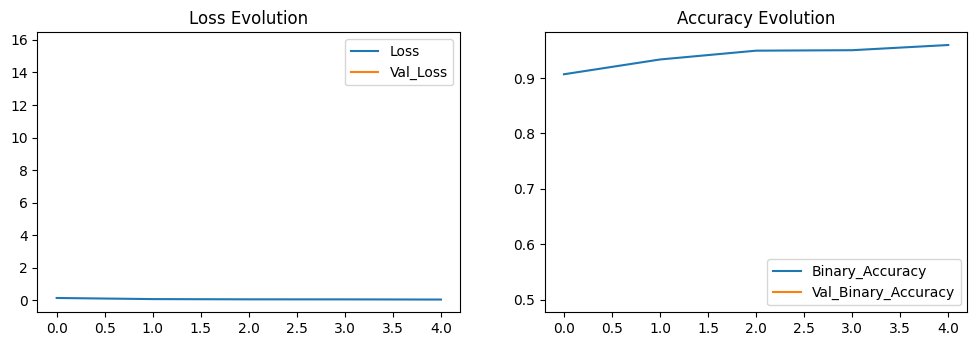

In [97]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(history.history['binary_accuracy'], label='Binary_Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Val_Binary_Accuracy')
plt.legend()
plt.title("Accuracy Evolution")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Chest Image After CNN Modelling')

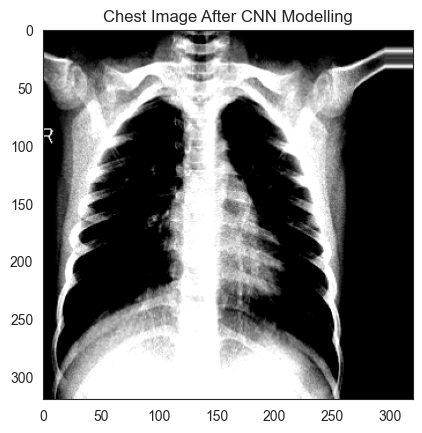

In [104]:
sns.set_style('white')
generated_image, label = train_path.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.title("Chest Image After CNN Modelling")

# Data Evaluation and Prediction

In [99]:
result = model.evaluate(
    val_path,
    verbose=1,
    steps=32
)

32/32 [==============================] - 1s 1ms/step - loss: 3.2148 - binary_accuracy: 0.5625


In [100]:
evaluation = model.evaluate(test_path)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
evaluation_train = model.evaluate(train_path)
print(f"Train Accuracy: {evaluation_train[1] * 100:.2f}%")

20/20 [==============================] - 36s 2s/step - loss: 1.3619 - binary_accuracy: 0.7131
Test Accuracy: 71.31%
163/163 [==============================] - 245s 2s/step - loss: 0.2641 - binary_accuracy: 0.9039
Train Accuracy: 90.39%


In [101]:
predict = model.predict(test_path)
print(confusion_matrix(test_path.classes, predict > 0.5))
pd.DataFrame(classification_report(test_path.classes, predict > 0.5, output_dict=True))

[[ 17 217]
 [ 35 355]]


,0,1,accuracy,macro avg,weighted avg
precision,0.326923,0.620629,0.596154,0.473776,0.510490
recall,0.072650,0.910256,0.596154,0.491453,0.596154
f1-score,0.118881,0.738046,0.596154,0.428463,0.505859
support,234.000000,390.000000,0.596154,624.000000,624.000000


In [102]:
print(confusion_matrix(test_path.classes, predict > 0.7))
pd.DataFrame(classification_report(test_path.classes, predict > 0.7, output_dict=True))

[[ 26 208]
 [ 48 342]]


,0,1,accuracy,macro avg,weighted avg
precision,0.351351,0.621818,0.589744,0.486585,0.520393
recall,0.111111,0.876923,0.589744,0.494017,0.589744
f1-score,0.168831,0.727660,0.589744,0.448245,0.518099
support,234.000000,390.000000,0.589744,624.000000,624.000000


In [103]:
im = test_path
images = next(im)
images[0].shape
results = model.predict(images[0])
print(results)   

[[1.        ]
 [0.9999956 ]
 [0.98515296]
 [1.        ]
 [0.2687539 ]
 [1.        ]
 [0.01841828]
 [0.9995127 ]
 [0.47876555]
 [0.95707715]
 [0.99988544]
 [0.99999475]
 [1.        ]
 [0.9992335 ]
 [1.        ]
 [0.99999857]
 [0.999999  ]
 [1.        ]
 [0.44775963]
 [0.9996928 ]
 [0.9990344 ]
 [0.9749309 ]
 [0.9999969 ]
 [0.99996907]
 [0.97085595]
 [0.99999976]
 [0.9982306 ]
 [0.99999154]
 [0.9999968 ]
 [0.63786274]
 [0.32442778]
 [0.99999833]]
